# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [ ]:
# Test ONE API call
# city = "los angeles"
# url = "http://api.openweathermap.org/data/2.5/weather?"
# query_url = f"{url}appid={api_key}&q={city},US"
# weatherone = requests.get(query_url).json()
# weatherone

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
citylats = []
citylngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs = list(lat_lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        citylats.append(lat_lng[0])
        citylngs.append(lat_lng[1])

# Print the city count to confirm sufficient count
print(len(cities))
print(len(citylats))
print(len(citylngs))

620
620
620


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
temperatures = dict()

#Loop Through list "cities"
for city in cities:
    query_url = f"{url}appid={api_key}&q={city},US"
    weather = requests.get(query_url).json()
    if weather == {'cod': '404', 'message': 'city not found'}:
        print ("City {} not found. Skipping...".format(city))
    else:
        print ("Current weather for {}: ".format(city)+str(weather['main']['temp']))
        temperatures[city] = [weather['main']['temp'],weather['main']['humidity'],weather['wind']['speed'],
                              weather['clouds']['all'],weather["coord"]["lon"],weather["coord"]["lat"]]

Current weather for carnarvon: 291.6
City qaanaaq not found. Skipping...
City torbay not found. Skipping...
City santiago del estero not found. Skipping...
City tuatapere not found. Skipping...
City chara not found. Skipping...
Current weather for fortuna: 288.45
City bansko not found. Skipping...
City grand centre not found. Skipping...
City tiksi not found. Skipping...
City killybegs not found. Skipping...
City kigoma not found. Skipping...
Current weather for hilo: 298.97
City ponta do sol not found. Skipping...
Current weather for hobart: 285.86
City lyubech not found. Skipping...
City ushuaia not found. Skipping...
City rikitea not found. Skipping...
City mount isa not found. Skipping...
City zhicheng not found. Skipping...
City cockburn town not found. Skipping...
City tabukiniberu not found. Skipping...
Current weather for barrow: 288.29
City chicama not found. Skipping...
City lebu not found. Skipping...
Current weather for port elizabeth: 287.7
Current weather for san patricio

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
df = pd.DataFrame.from_dict(temperatures, orient='index')
df.to_csv(output_data_file)
df.head()

,0,1,2,3,4,5
carnarvon,291.60,37,6.2,1,-95.02,42.25
fortuna,288.45,77,2.6,40,-124.16,40.60
hilo,298.97,62,2.6,75,-155.08,19.71
hobart,285.86,76,4.1,75,-121.97,47.41
barrow,288.29,51,1.5,1,-90.40,39.51


In [7]:
#read csv back in and convert to dataframe with proper headers
data = pd.read_csv(output_data_file,names=['City','Temperature','Humidity','Wind','Cloud','Longitude','Latitude'])
data = data.iloc[1:]
data.head()

,City,Temperature,Humidity,Wind,Cloud,Longitude,Latitude
1,carnarvon,291.60,37,6.2,1,-95.02,42.25
2,fortuna,288.45,77,2.6,40,-124.16,40.60
3,hilo,298.97,62,2.6,75,-155.08,19.71
4,hobart,285.86,76,4.1,75,-121.97,47.41
5,barrow,288.29,51,1.5,1,-90.40,39.51


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

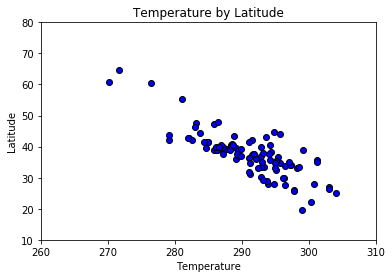

In [16]:
# Tell matplotlib to create a scatter plot based upon the above data

plt.scatter(data["Temperature"], data["Latitude"], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(10,80)

# Set the upper and lower limits of our x axis
plt.xlim(260,310)

# Create a title, x label, and y label for our chart
plt.title("Temperature by Latitude")
plt.xlabel("Temperature")
plt.ylabel("Latitude")

plt.savefig("Temp v Lat.png", bbox_inches = 'tight')
plt.show()

#### Latitude vs. Humidity Plot

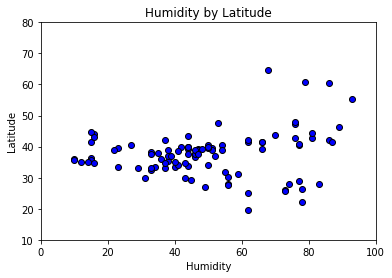

In [17]:
# Tell matplotlib to create a scatter plot based upon the above data

plt.scatter(data["Humidity"], data["Latitude"], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(10,80)

# Set the upper and lower limits of our x axis
plt.xlim(0,100)

# Create a title, x label, and y label for our chart
plt.title("Humidity by Latitude")
plt.xlabel("Humidity")
plt.ylabel("Latitude")

plt.savefig("Humidity v Lat.png", bbox_inches = 'tight')
plt.show()

#### Latitude vs. Cloudiness Plot

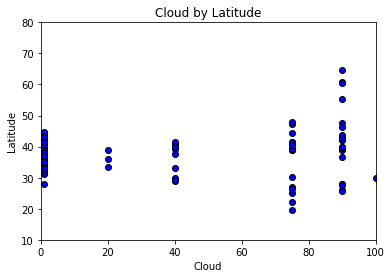

In [18]:
# Tell matplotlib to create a scatter plot based upon the above data

plt.scatter(data["Cloud"], data["Latitude"], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(10,80)

# Set the upper and lower limits of our x axis
plt.xlim(0,100)

# Create a title, x label, and y label for our chart
plt.title("Cloud by Latitude")
plt.xlabel("Cloud")
plt.ylabel("Latitude")

plt.savefig("Cloud v Lat.png", bbox_inches = 'tight')
plt.show()

#### Latitude vs. Wind Speed Plot

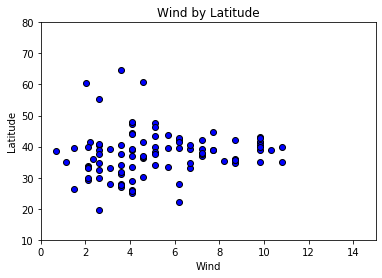

In [21]:
# Tell matplotlib to create a scatter plot based upon the above data

plt.scatter(data["Wind"], data["Latitude"], marker="o", facecolors="blue", edgecolors="black")

# Set the upper and lower limits of our y axis
plt.ylim(10,80)

# Set the upper and lower limits of our x axis
plt.xlim(0,15)

# Create a title, x label, and y label for our chart
plt.title("Wind by Latitude")
plt.xlabel("Wind")
plt.ylabel("Latitude")

plt.savefig("Wind v Lat.png", bbox_inches = 'tight')
plt.show()